# Predictive Modeling for Alzheimer's Disease Risk Factors
#### By Adrian Chavez-Loya

## Introduction

Alzheimer's disease is a complex neurodegenerative disorder that affects millions worldwide. Understanding the factors associated with Alzheimer's can aid in early diagnosis and intervention strategies. This study aims to identify significant predictors of Alzheimer's disease using machine learning techniques on a comprehensive dataset.

The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive assessments, symptoms, and a diagnosis of Alzheimer's Disease. By exploring this rich dataset, we aim to uncover key insights into the interplay of various factors contributing to Alzheimer's risk.

## Methodology

### Data Preparation and Exploration

The dataset contains extensive information on 2,149 patients, encompassing variables such as age, gender, ethnicity, lifestyle habits, medical history, cognitive assessments, and more. 

### Data Source

[Alzheimer's Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset)

**Citation:**
- Title: Alzheimer's Disease Dataset
- Author: Rabie El Kharoua
- Publisher: Kaggle
- Year: 2024
- DOI: [10.34740/KAGGLE/DSV/8668279](https://doi.org/10.34740/KAGGLE/DSV/8668279)


### Analytical Objectives

We aim to:
- Identify the most significant predictors of Alzheimer's disease through correlation analysis and feature importance ranking
- Develop and compare multiple machine learning models for accurate Alzheimer's classification  
- Determine which demographic, lifestyle, clinical, and cognitive factors have the strongest association with Alzheimer's diagnosis
- Provide data-driven insights that could inform early detection strategies


### Data Preprocessing

In [15]:
import pandas as pd 
df = pd.read_csv('alzheimers_disease_data.csv') # Imported Data
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [16]:
print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Diagnosis distribution: {df['Diagnosis'].value_counts()}")

Dataset shape: (2149, 35)
Missing values: 0
Diagnosis distribution: Diagnosis
0    1389
1     760
Name: count, dtype: int64


**Results:**
- **Total Records**: 2,149 patients
- **Missing Values**: 0 (Complete dataset - no imputation needed)
- **Class Distribution**:
  - Non-Alzheimer's (0): 1,389 patients (64.6%)
  - Alzheimer's (1): 760 patients (35.4%)

The dataset is clean with no missing values and good class balance! All variables are properly encoded for machine learning analysis.

### Dataset Variables Overview

Below is a table explaining the different variables included in our dataset. The dataset is properly encoded and allows us to directly proceed with analysis!


| Category | Variable | Description | Encoding/Scale |
|----------|----------|-------------|----------------|
| **Demographic** | Age | Patient age in years | 60-90 years |
|  | Gender | Biological sex | 0 = Male, 1 = Female |
|  | Ethnicity | Racial/ethnic background | 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other |
|  | EducationLevel | Education level | 0 = None, 1 = High School, 2 = Bachelor's, 3 = Higher |
| **Lifestyle** | BMI | Body Mass Index | 15-40 kg/m² |
|  | Smoking | Tobacco use status | 0 = No, 1 = Yes |
|  | AlcoholConsumption | Weekly alcohol consumption | 0-20 units |
|  | PhysicalActivity | Weekly physical activity | 0-10 hours |
|  | DietQuality | Diet quality score | 0-10 (Higher = Better) |
|  | SleepQuality | Sleep quality score | 4-10 (Higher = Better) |
| **Medical History** | FamilyHistoryAlzheimers | Genetic predisposition | 0 = No, 1 = Yes |
|  | CardiovascularDisease | Heart/circulatory conditions | 0 = No, 1 = Yes |
|  | Diabetes | Blood sugar disorder | 0 = No, 1 = Yes |
|  | Depression | Mental health condition | 0 = No, 1 = Yes |
|  | HeadInjury | History of head trauma | 0 = No, 1 = Yes |
|  | Hypertension | High blood pressure | 0 = No, 1 = Yes |
| **Clinical Measurements** | SystolicBP | Blood pressure (upper) | 90-180 mmHg |
|  | DiastolicBP | Blood pressure (lower) | 60-120 mmHg |
|  | CholesterolTotal | Total cholesterol level | 150-300 mg/dL |
|  | CholesterolLDL | "Bad" cholesterol | 50-200 mg/dL |
|  | CholesterolHDL | "Good" cholesterol | 20-100 mg/dL |
|  | CholesterolTriglycerides | Blood fats | 50-400 mg/dL |
| **Cognitive Assessments** | MMSE | Mini-Mental State Exam | 0-30 (Higher = Better cognition) |
|  | FunctionalAssessment | Daily functioning ability | 0-10 (Higher = Better function) |
|  | ADL | Activities of Daily Living | 0-10 (Higher = More independent) |
| **Behavioral Symptoms** | MemoryComplaints | Self-reported memory issues | 0 = No, 1 = Yes |
|  | BehavioralProblems | Behavioral changes | 0 = No, 1 = Yes |
|  | Confusion | Mental confusion episodes | 0 = No, 1 = Yes |
|  | Disorientation | Spatial/temporal confusion | 0 = No, 1 = Yes |
|  | PersonalityChanges | Personality alterations | 0 = No, 1 = Yes |
|  | DifficultyCompletingTasks | Task execution problems | 0 = No, 1 = Yes |
|  | Forgetfulness | Memory lapse frequency | 0 = No, 1 = Yes |
| **Target** | Diagnosis | Alzheimer's Disease status | 0 = Negative, 1 = Positive |
| **Administrative** | DoctorInCharge | Confidential doctor information | "XXXConfid" (to be excluded from analysis) |

In [17]:
# Drop unnecessary columns permanently
df = df.drop(columns=['DoctorInCharge', 'PatientID'])
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


## Correlation Matrix

We will use a correlation matrix to find correlations between variables and target variable which is Alzheimer's diagnosis. 

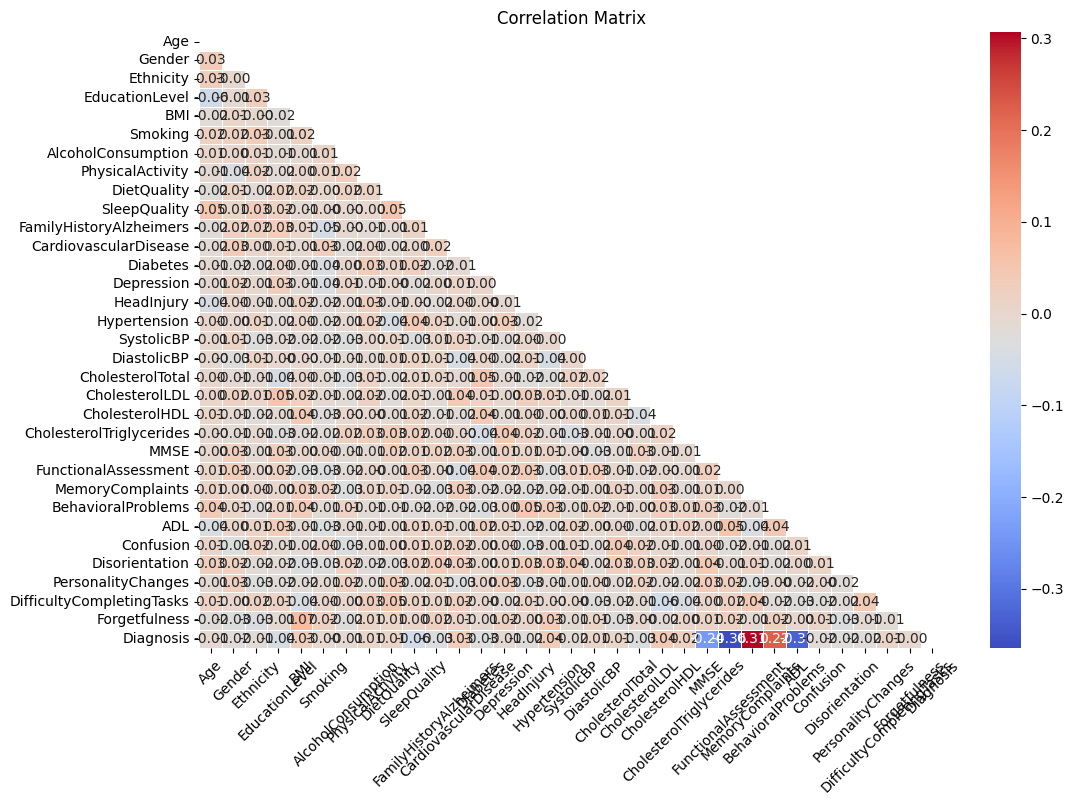

Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
DiastolicBP                  0.005293
Forgetfulness               -0.000354
Smoking                     -0.004865
Age                         -0.005488
Depression                  -0.005893
AlcoholConsumption          -0.007618
Ethnicity                   -0.014782
SystolicBP                  -0.015615
Confusion                   -0.019186
PersonalityChanges          -0.020627
Gender                      -0.020975
HeadInjury                  -0.021411
Disorientation              -0.024648
Diabetes                    -0.031508
CholesterolL

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation matrix
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask for the upper triangle 

# Heatplot configuration
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

# Correlations with the target variable (Diagnosis)
corr_with_target = corr_matrix['Diagnosis'].sort_values(ascending=False)
print(corr_with_target)

### Correlation Analysis Results

#### Key Clinical Predictors
| Feature | Correlation | Clinical Significance |
|---------|-------------|----------------------|
| **Functional Assessment** | -0.365 | Measures daily task performance - decline indicates disease progression |
| **ADL** | -0.332 | Basic self-care abilities - impairment signals advanced stage |
| **MMSE** | -0.237 | Gold standard cognitive test - lower scores confirm diagnosis |
| **Memory Complaints** | 0.307 | Early patient-reported symptom - often first warning sign |
| **Behavioral Problems** | 0.224 | Personality/mood changes - common in mid-stage disease |

#### Clinical Insights
- **Cognitive/functional tests** strongest predictors (expected - core diagnostic tools)
- **Patient symptoms** valuable for early detection before clinical tests show decline
- **Traditional risk factors** (diet, exercise) show minimal impact in this dataset
- **HDL correlation** (0.043) too weak for clinical relevance



### Feature Selection for Modeling

Based on our correlation analysis, we filter the dataset to include only features with meaningful predictive power (|correlation| ≥ 0.05). This removes noise and focuses our models on the strongest predictors.

In [21]:
# Filtered down to features with meaningful correlation (|r| >= 0.05)
significant_features = corr_with_target[abs(corr_with_target) >= 0.05].index.tolist()
print("Features with meaningful correlation (|r| >= 0.05):")
print(significant_features)

# Filtered dataset with only significant features
df = df[significant_features]
print(f"\nReduced dataset shape: {df.shape}")
print("Final features:", df.columns.tolist())

Features with meaningful correlation (|r| >= 0.05):
['Diagnosis', 'MemoryComplaints', 'BehavioralProblems', 'SleepQuality', 'MMSE', 'ADL', 'FunctionalAssessment']

Reduced dataset shape: (2149, 7)
Final features: ['Diagnosis', 'MemoryComplaints', 'BehavioralProblems', 'SleepQuality', 'MMSE', 'ADL', 'FunctionalAssessment']


### Model Training with Selected Features

We now train multiple machine learning models using the 6 strongest predictors identified from our correlation analysis. The dataset has been split into training (80%) and testing (20%) sets, and features are standardized for optimal performance.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Features and target variable
X = df.drop(columns=['Diagnosis'])  # Fixed: PatientID already removed
y = df['Diagnosis']

# Data split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Features standarized (with standard scaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with L1 regularization (Lasso)
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)

# Display feature importance
importance = abs(logreg.coef_[0])
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                Feature  Importance
5  FunctionalAssessment    1.315204
4                   ADL    1.236592
0      MemoryComplaints    1.056284
3                  MMSE    0.858940
1    BehavioralProblems    0.846633
2          SleepQuality    0.082270


### Logistic Regression Feature Importance

The LASSO logistic regression confirms our correlation analysis, showing the same top predictors with similar ranking:

| Feature | Importance Score |
|---------|------------------|
| **Functional Assessment** | 1.315 |
| **ADL** | 1.237 |
| **Memory Complaints** | 1.056 |
| **MMSE** | 0.859 |
| **Behavioral Problems** | 0.847 |
| **Sleep Quality** | 0.082 |

**Key Validation:**
- Same top 6 features identified by both correlation and LASSO
- Sleep Quality has much lower importance (0.082 vs ~1.3 for others)
- Model automatically weighted features according to predictive power


### Comprehensive Model Comparison

We now evaluate four different machine learning algorithms to identify the best performing model for Alzheimer's classification using our 6 selected features.

In [23]:
# Model Evaluation Function 
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


In [24]:
# Logistic Regression with L1 regularization (Lasso)
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg_acc, logreg_prec, logreg_rec, logreg_f1 = evaluate_model(logreg, X_train, y_train, X_test, y_test)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree_acc, dtree_prec, dtree_rec, dtree_f1 = evaluate_model(dtree, X_train, y_train, X_test, y_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf_acc, rf_prec, rf_rec, rf_f1 = evaluate_model(rf, X_train, y_train, X_test, y_test)

# Support Vector Machine Classifier
svm = SVC(random_state=42)
svm_acc, svm_prec, svm_rec, svm_f1 = evaluate_model(svm, X_train, y_train, X_test, y_test)


# Model Performance
print("Logistic Regression - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(logreg_acc, logreg_prec, logreg_rec, logreg_f1))
print("Decision Tree - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(dtree_acc, dtree_prec, dtree_rec, dtree_f1))
print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(rf_acc, rf_prec, rf_rec, rf_f1))
print("SVM - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(svm_acc, svm_prec, svm_rec, svm_f1))

Logistic Regression - Accuracy: 0.8326, Precision: 0.7914, Recall: 0.7190, F1-score: 0.7534
Decision Tree - Accuracy: 0.9233, Precision: 0.8947, Recall: 0.8889, F1-score: 0.8918
Random Forest - Accuracy: 0.9558, Precision: 0.9653, Recall: 0.9085, F1-score: 0.9360
SVM - Accuracy: 0.9070, Precision: 0.9065, Recall: 0.8235, F1-score: 0.8630


### Model Performance Results

| Model | Accuracy | Precision | Recall | F1-Score |
|-------|----------|-----------|--------|----------|
| **Random Forest** | **95.6%** | **96.5%** | 90.9% | **93.6%** |
| Decision Tree | 92.3% | 89.5% | **88.9%** | 89.2% |
| SVM | 90.7% | 90.7% | 82.4% | 86.3% |
| Logistic Regression | 83.3% | 79.1% | 71.9% | 75.3% |

#### Key Findings:
- **Random Forest is the best performer across all metrics**
- **95.6% accuracy** demonstrates strong predictive powerwith very few false positives
- All models perform well, confirming our feature selection was effective!!

The selected 6 features provide excellent predictive capability for Alzheimer's classification.

### Random Forest Feature Importance Analysis

                Feature  Importance
5  FunctionalAssessment    0.284297
4                   ADL    0.250254
3                  MMSE    0.211606
0      MemoryComplaints    0.116211
1    BehavioralProblems    0.075095
2          SleepQuality    0.062537


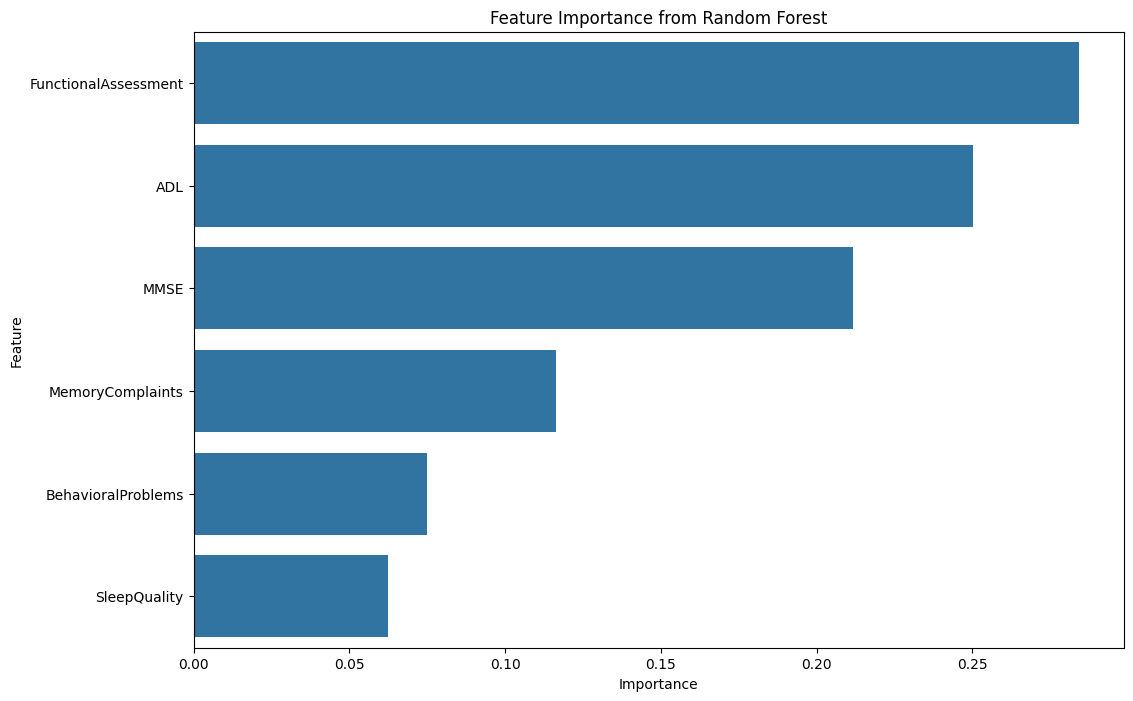

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Ranking
importance = rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importance})  # Fixed: use X.columns
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_rf)

plt.figure(figsize=(12, 8)) # Feature Importance Plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance from Random Forest')
plt.show()


## Feature Importance Analysis

| Feature | Importance |
|---------|------------|
| FunctionalAssessment | 28.4% |
| ADL | 25.0% |
| MMSE | 21.2% |
| MemoryComplaints | 11.6% |
| BehavioralProblems | 7.5% |
| SleepQuality | 6.3% |

## Key Findings

**Clinical assessments are 3x more predictive than symptoms**
- Top 3 tests (FunctionalAssessment, ADL, MMSE): 74.6% of predictive power
- All symptoms combined: 25.4% of predictive power

**Standardized testing is essential**
- Objective measures vastly outperform subjective complaints
- Symptoms should trigger testing but not replace it

**Surprising Insights**
- **Memory complaints are the most important symptom** by a significant margin
- **Behavioral problems are a meaningful secondary indicator**
- Sleep quality has minimal predictive value on its own
- **Traditional risk factors** (family history, diabetes, head injuries) show very weak correlation with diagnosis!! However, 

**Actionable Insight**: *Prioritize formal assessments over symptom monitoring for accurate evaluation.* While symptoms like memory issues and behavioral changes should prompt clinical evaluation, they cannot replace standardized testing for reliable diagnosis!!

## Evidence-Based Prevention Strategies

**While our analysis focuses on diagnosis, prevention remains crucial. Based on broader Alzheimer's research I will like to share the following!:**

**Lifestyle & Cardiovascular Health**
- **Physical Exercise**: Regular aerobic activity shows strong protective effects
- **Heart-Healthy Diet**: Mediterranean or MIND diets correlate with reduced risk
- **Blood Pressure Management**: Controlling hypertension in midlife reduces late-life dementia risk

**Cognitive Engagement**
- **Lifelong Learning**: Continued education and cognitive stimulation build resilience
- **Social Engagement**: Maintaining strong social connections appears protective

**Risk Factor Management**
- **Diabetes Control**: Managing blood sugar reduces associated dementia risk
- **Hearing Protection**: Addressing hearing loss may help maintain cognitive function
- **Sleep Quality**: Treating sleep disorders like apnea can reduce risk accumulation

**Important Note**: These prevention strategies address long-term risk reduction in the general population, while our analysis focused on diagnostic accuracy in symptomatic individuals. Both approaches are complementary for comprehensive brain health management.